In [1]:
# librería que contiene el dataset "Boston" correspondiente a precios de casas de acuerdo a sus características
# install.packages("MASS")
library(MASS)

# paquete para particionar datos para prueba y entrenamiento:
# install.packages('caTools')
library(caTools)

# Paquete para usar redes neuronales:
# install.packages("neuralnet")
library(neuralnet)

library(ggplot2)

## Cargamos dataset

In [2]:
df <- Boston
class(df)

[1] "data.frame"

In [3]:
head(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
str(df)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


`medv` <-- corresponde al precio de la casa en miles de dólares (target a estimar)

In [5]:
# Verificamos si hay algun campo nulo en el dataset:
any(is.na(df))

[1] FALSE

### Normalizamos dataset

In [6]:
# Extraemos los mínimos de cada columna:
min_cols <- apply(df,2,min)
min_cols

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

In [7]:
# Extraemos los máximos de cada columna:
max_cols <- apply(df,2,max)
max_cols

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [8]:
y_min <- min_cols[['medv']]
y_min

[1] 5

In [9]:
y_max <- max_cols[['medv']]
y_max

[1] 50

In [10]:
df_scaled <- scale(df, center=min_cols, scale=max_cols)
class(df_scaled)

[1] "matrix" "array"

In [11]:
df_scaled <- as.data.frame(df_scaled)
class(df_scaled)

[1] "data.frame"

In [12]:
head(df_scaled)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06669070,0,0.17566016,0.3432802,0.623,0.2441265,0.00000000,0.15330520,0.1227273,0.9991938,0.08559389,0.380
2,0.0002359058,0.00,0.23828407,0,0.09644087,0.3257403,0.760,0.3164557,0.04166667,0.07735584,0.2363636,0.9991938,0.19515407,0.332
3,0.0002356810,0.00,0.23828407,0,0.09644087,0.4127563,0.582,0.3164557,0.04166667,0.07735584,0.2363636,0.9889393,0.06057414,0.594
4,0.0002927749,0.00,0.06200433,0,0.08381171,0.3914579,0.429,0.4067621,0.08333333,0.04922644,0.2772727,0.9934744,0.03186726,0.568
5,0.0007050200,0.00,0.06200433,0,0.08381171,0.4084282,0.513,0.4067621,0.08333333,0.04922644,0.2772727,0.9991938,0.09481169,0.624
6,0.0002644527,0.00,0.06200433,0,0.08381171,0.3267654,0.558,0.4067621,0.08333333,0.04922644,0.2772727,0.9921895,0.09165130,0.474


In [13]:
summary(df_scaled)

      crim                 zn             indus             chas        
 Min.   :0.0000000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0008511   1st Qu.:0.0000   1st Qu.:0.1705   1st Qu.:0.00000  
 Median :0.0028119   Median :0.0000   Median :0.3327   Median :0.00000  
 Mean   :0.0405412   Mean   :0.1136   Mean   :0.3849   Mean   :0.06917  
 3rd Qu.:0.0412556   3rd Qu.:0.1250   3rd Qu.:0.6359   3rd Qu.:0.00000  
 Max.   :0.9999290   Max.   :1.0000   Max.   :0.9834   Max.   :1.00000  
      nox                rm              age              dis         
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.07348   1st Qu.:0.2647   1st Qu.:0.4213   1st Qu.:0.08004  
 Median :0.17566   Median :0.3015   Median :0.7460   Median :0.17135  
 Mean   :0.19483   Mean   :0.3102   Mean   :0.6567   Mean   :0.21980  
 3rd Qu.:0.27440   3rd Qu.:0.3488   3rd Qu.:0.9117   3rd Qu.:0.33471  
 Max.   :0.55798   Max.   :0.5944   Max.   :0.9710   Max.   :0.

## Particionamos datos para entrenamiento y pruebas

In [14]:
# establecemos una semilla para que se preserve la configuración del particionamiento de datos:
set.seed(80)

p_train <- 0.7 #  <-- Porcentaje para datos de entrenamiento

# "medv" <-- labels a predecir
booleans <- sample.split( df_scaled$medv, SplitRatio = p_train )

In [15]:
df_train_scaled <- subset( df_scaled, booleans == TRUE)
head(df_train_scaled)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.180,0.06669070,0,0.17566016,0.3432802,0.623,0.2441265,0.00000000,0.15330520,0.1227273,0.9991938,0.08559389,0.380
3,0.0002356810,0.000,0.23828407,0,0.09644087,0.4127563,0.582,0.3164557,0.04166667,0.07735584,0.2363636,0.9889393,0.06057414,0.594
4,0.0002927749,0.000,0.06200433,0,0.08381171,0.3914579,0.429,0.4067621,0.08333333,0.04922644,0.2772727,0.9934744,0.03186726,0.568
7,0.0009212576,0.125,0.26712329,0,0.15958668,0.2791572,0.637,0.3653898,0.16666667,0.17440225,0.1181818,0.9959184,0.28180142,0.358
9,0.0023030878,0.125,0.26712329,0,0.15958668,0.2357631,0.971,0.4084031,0.16666667,0.17440225,0.1181818,0.9733182,0.74269160,0.230
10,0.0018400426,0.125,0.26712329,0,0.15958668,0.2782460,0.830,0.4504597,0.16666667,0.17440225,0.1181818,0.9735198,0.40479326,0.278


In [16]:
dim(df_train_scaled)

[1] 367  14

In [17]:
df_test_scaled <- subset( df_scaled, booleans == FALSE)
head(df_test_scaled)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.0002359058,0.000,0.23828407,0,0.09644087,0.3257403,0.760,0.3164557,0.04166667,0.07735584,0.2363636,0.9991938,0.19515407,0.332
5,0.0007050200,0.000,0.06200433,0,0.08381171,0.4084282,0.513,0.4067621,0.08333333,0.04922644,0.2772727,0.9991938,0.09481169,0.624
6,0.0002644527,0.000,0.06200433,0,0.08381171,0.3267654,0.558,0.4067621,0.08333333,0.04922644,0.2772727,0.9921895,0.09165130,0.474
8,0.0015535615,0.125,0.26712329,0,0.15958668,0.2973804,0.932,0.3975508,0.16666667,0.17440225,0.1181818,0.9991938,0.45878325,0.442
15,0.0070989770,0.000,0.27685652,0,0.17566016,0.2887244,0.816,0.2747949,0.12500000,0.16877637,0.3818182,0.9566641,0.22465104,0.264
17,0.0117740474,0.000,0.27685652,0,0.17566016,0.2703872,0.264,0.2778213,0.12500000,0.16877637,0.3818182,0.9738725,0.12773242,0.362


In [18]:
dim(df_test_scaled)

[1] 139  14

## Modelado

In [19]:
colnames(df)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [20]:
# Indicamos el label y las variables (en forma de suma) que estimarán el label:
# f <- Y ~ X1 + X2 +...+ Xn
f <- medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat
f

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

In [21]:
# Creamos el modelo de la red y lo entrenamos

# Número de neuronas por capa
nn_layers <- c(5,5,3)

model_nn <- neuralnet(f, data= df_train_scaled, hidden=nn_layers, linear.output=TRUE)
plot(model_nn)

## Evaluamos predicciones

In [22]:
predict_scaled <- compute(model_nn, df_test_scaled)

In [23]:
str(predict_scaled)

List of 2
 $ neurons   :List of 4
  ..$ : num [1:139, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "2" "5" "6" "8" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "2" "5" "6" "8" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "2" "5" "6" "8" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "2" "5" "6" "8" ...
  .. .. ..$ : NULL
 $ net.result: num [1:139, 1] 0.361 0.518 0.398 0.28 0.284 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:139] "2" "5" "6" "8" ...
  .. ..$ : NULL


In [24]:
# Etiquetas aproximadas (escaladas)
approx_test_scaled <- predict_scaled$net.result
class(approx_test_scaled)

[1] "matrix" "array"

In [25]:
# Etiquetas observadas (escaladas)
label_test_scaled <- df_test_scaled$medv
class(label_test_scaled)

[1] "numeric"

### Calculamos predicciones sin el reescalamiento

In [26]:
# Etiquetas observadas (sin escalar)
label_test <- subset( df$medv, booleans == FALSE)
class(label_test)

[1] "numeric"

In [27]:
# Etiquetas aproximadas (sin escalar)
approx_test <- approx_test_scaled*(y_max - y_min) + y_min
class(approx_test)

[1] "matrix" "array"

In [28]:
df_results <- data.frame(label_test_scaled, approx_test_scaled, label_test, approx_test)
head(df_results)

,label_test_scaled,approx_test_scaled,label_test,approx_test
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.332,0.3613837,21.6,21.26227
5,0.624,0.5175612,36.2,28.29025
6,0.474,0.3982781,28.7,22.92251
8,0.442,0.2797555,27.1,17.58900
15,0.264,0.2838078,18.2,17.77135
17,0.362,0.3086531,23.1,18.88939


In [29]:
index = 1:nrow(df_results)
data_to_plot <- ggplot(df_results, aes(x=index))

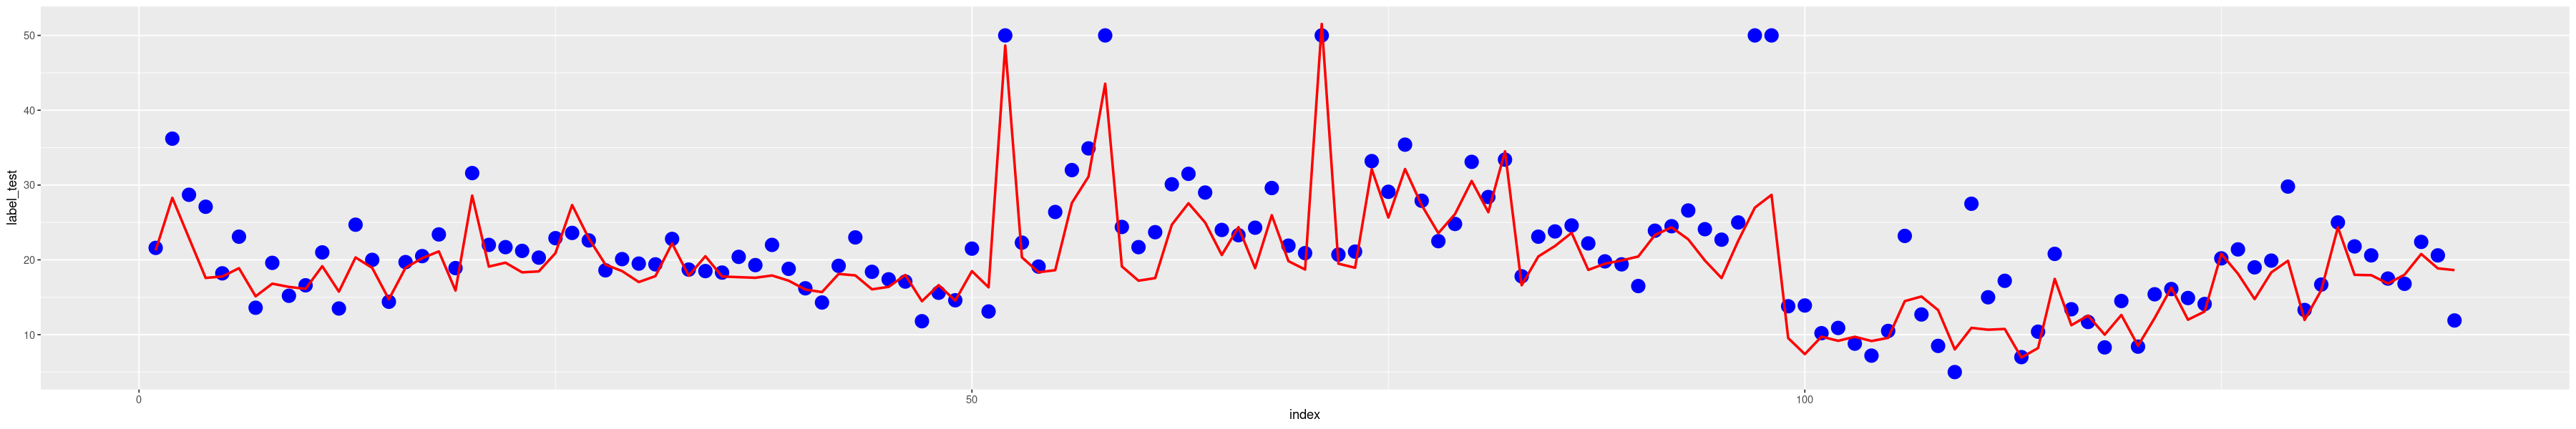

In [30]:
options(repr.plot.width=30, repr.plot.height=5)
plt_obs <- data_to_plot + geom_point(aes(y=label_test), size=5, color="blue") + geom_line(aes(y=approx_test), linewidth=1 ,color="red")
plt_obs

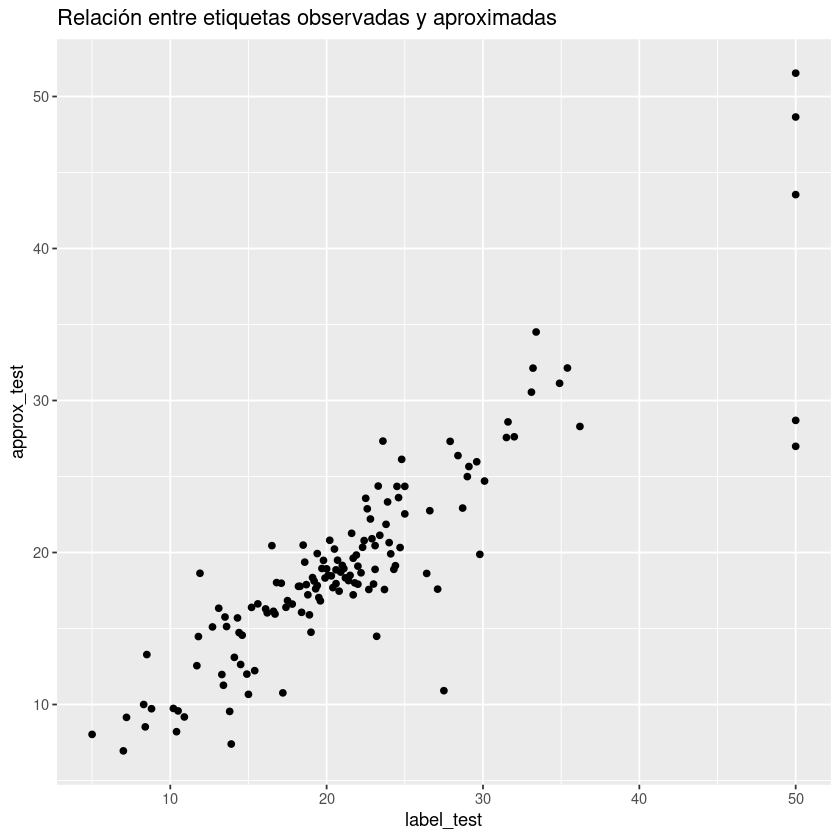

In [31]:
options(repr.plot.width=7, repr.plot.height=7)
grafico <- ggplot( df_results, aes(x=label_test, y=approx_test) ) + geom_point()+ ggtitle("Relación entre etiquetas observadas y aproximadas")
grafico

## Métricas de error

In [32]:
error <- sum( (label_test -  approx_test)^2 )/length(label_test)
error

[1] 19.30795